<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری اول تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>

</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [70]:
# TO-DO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy
import statsmodels.api as sm
import tensorflow as tf
import torch
#import xgboost as xgb
#import lightgbm as lgb
#import nltk
#import spacy


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [71]:
# load data

# Specify the path to your Excel file
file_path = "worldcities.xlsx"

# Load the data into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the data was loaded
print(df.head())


      ville ville_ascii      lat       lng         pays iso2 iso3  \
0  A Coruña    A Coruna  43.3667   -8.3833        Spain   ES  ESP   
1  A Yun Pa    A Yun Pa  13.3939  108.4408      Vietnam   VN  VNM   
2  Aabenraa    Aabenraa  55.0444    9.4181      Denmark   DK  DNK   
3    Aachen      Aachen  50.7756    6.0836      Germany   DE  DEU   
4    Aadorf      Aadorf  47.4939    8.8975  Switzerland   CH  CHE   

                admin_nom capital  population            id  
0                 Galicia   minor    245468.0  1.724417e+09  
1                 Gia Lai   minor     53720.0  1.704946e+09  
2              Syddanmark   minor     16401.0  1.208000e+09  
3  North Rhine-Westphalia   minor    249070.0  1.276806e+09  
4                 Thurgau     NaN      9036.0  1.756023e+09  


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
حذف و تغییر نام ستون ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌های
<code>id</code>،
<code>‌capital</code>،
<code>ville_ascii</code> 
و 
<code>admin_nom</code>
 را از دیتافریم حذف نمایید.
سپس نام ستون‌های 
<code>ville</code> 
و 
<code>pays</code>
 که به زبان فرانسوی نامگذاری شده‌اند را به ترتیب به 
<code>city</code> 
و 
<code>country</code>
تغییر دهید.
</font>
</p>
</div>

In [72]:
# drop and rename

# List of columns to be deleted
columns_to_delete = ["ville_ascii", "capital", "id", "admin_nom"]

# Delete the specified columns
df = df.drop(columns=columns_to_delete)

# Rename columns
df = df.rename(columns={"ville": "city", "pays": "country"})

# Display the updated DataFrame
print(df.head())

       city      lat       lng      country iso2 iso3  population
0  A Coruña  43.3667   -8.3833        Spain   ES  ESP    245468.0
1  A Yun Pa  13.3939  108.4408      Vietnam   VN  VNM     53720.0
2  Aabenraa  55.0444    9.4181      Denmark   DK  DNK     16401.0
3    Aachen  50.7756    6.0836      Germany   DE  DEU    249070.0
4    Aadorf  47.4939    8.8975  Switzerland   CH  CHE      9036.0


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
فیلتر کردن داده ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شهر‌های با جمعیت اکیدا کمتر از ۱ میلیون نفر  را از دیتافریم حذف کرده و سپس نوع داده‌های ستون 
<code>population</code>
 را از 
 <code>float</code>
  به
  <code>int32</code>
   تبدیل نمایید.
</p>
</div>



In [73]:
# filter data

# Filter cities with a population of 1 million or more
df = df[df['population'] >= 1000000]

# Display the updated DataFrame
print(df.head())

          city      lat      lng               country iso2 iso3  population
19         Aba   5.1167   7.3667               Nigeria   NG  NGA   1530000.0
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV   4980000.0
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE   1483000.0
131      Abuja   9.0667   7.4833               Nigeria   NG  NGA   3770000.0
169      Accra   5.5500  -0.2000                 Ghana   GH  GHA   2388000.0


In [74]:
# change type population

# Convert 'population' column to int32
df['population'] = df['population'].astype('int32')

# Display the updated DataFrame
print(df.head())

          city      lat      lng               country iso2 iso3  population
19         Aba   5.1167   7.3667               Nigeria   NG  NGA     1530000
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV     4980000
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE     1483000
131      Abuja   9.0667   7.4833               Nigeria   NG  NGA     3770000
169      Accra   5.5500  -0.2000                 Ghana   GH  GHA     2388000


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
کار با داده های تکراری و گم شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نخست ردیف‌های تکراری دیتافریم و سپس ردیف‌هایی که بیش از یک مورد (۲ مورد و بیش‌تر) از اطلاعات آن‌ها گم‌شده است را از دیتافریم حذف نمایید.
</p>
</div>



In [75]:
# remove duplicated and missed values

# Remove duplicated rows
df = df.drop_duplicates()

# Remove rows with two or more missing values
df = df.dropna(thresh=2)  # Change '2' to the desired threshold

# Display the updated DataFrame
print(df.head())


          city      lat      lng               country iso2 iso3  population
19         Aba   5.1167   7.3667               Nigeria   NG  NGA     1530000
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV     4980000
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE     1483000
131      Abuja   9.0667   7.4833               Nigeria   NG  NGA     3770000
169      Accra   5.5500  -0.2000                 Ghana   GH  GHA     2388000


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پر کردن داده های گم‌شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
برای مقادیر گم شده در ستون های 
<code>lat</code> 
و 
<code>lng</code>
، 
میانگین همان ستون را در
<ins><strong>همان کشور</strong></ins>
پر کنید
</p>
</div>



In [76]:
# fill the missing values by their country 

# Calculate the mean of the 'lat' and 'lng' columns
mean_lat = df['lat'].mean()
mean_lng = df['lng'].mean()
print("mean_lat=" + str(mean_lat))
print("mean_lng=" + str(mean_lng)) 

# Fill missing values with the mean
df['lat'].fillna(mean_lat, inplace=True)
df['lng'].fillna(mean_lng, inplace=True)

# Display the updated DataFrame
print(df.head())

#num_rows = df.shape[0]
#print(f"Number of rows in the DataFrame: {num_rows}")

mean_lat=26.285317861799214
mean_lng=61.97795169270834
          city      lat      lng               country iso2 iso3  population
19         Aba   5.1167   7.3667               Nigeria   NG  NGA     1530000
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV     4980000
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE     1483000
131      Abuja   9.0667   7.4833               Nigeria   NG  NGA     3770000
169      Accra   5.5500  -0.2000                 Ghana   GH  GHA     2388000


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
محاسبه فاصله
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم فاصله هر یک از شهر‌ها را از تهران حساب کنیم. برای این کار از فرمول هاورسین استفاده خواهیم کرد. این فرمول بر اساس طول جغرافیایی (Logitude) و عرض جغرافیایی (Latitude)  دو نقطه در سطح یک کره، فاصله آنها را حساب می‌کند.
فرمول محاسبه فاصله هاورسین در ادامه آورده شده است. 
خواسته ما این است که اول با توجه به فرمول هاورسین و مقادیر طول و عرض جغرافیایی تهران که از دیتافریم استخراج می‌کنید تابعی بنویسید که فاصله هر شهر را از تهران محاسبه کند و سپس با استفاده از آن تابع ستون جدیدی در دیتافریم ایجاد کنید که فاصله هر شهر از تهران را داشته باشد
</font>
</p>

</div>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرمول هاورسین:
</font>
</p>



$\lambda_1$, $\lambda_2$ : longitudes of the two points in radians (lng)

$\varphi_1$, $\varphi_2$ : the latitudes of the two points in radians (lat)

$d$ : distance between two cities


$$
r = 6371
$$
$$
a = \sin^2\left(\frac{\varphi_2-\varphi_1}{2}\right) + \cos(\varphi_1)\cos(\varphi_2)\sin^2\left(\frac{\lambda_2-\lambda_1}{2}\right)
$$
$$
d = 2r \operatorname{atan2}\left(\sqrt{a}, \sqrt{1 -a}\right)
$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>تذکر:</code>
دقت کنید که مقادیر طول و عرض جغرافیایی ثبت شده در دیتافریم به درجه می‌باشد و برای استفاده از رابطه فوق باید به رادیان تبدیل گردد. همچنین توجه کنید ملاک ارزیابی پاسخ شما فرمول فوق و طول و عرض جغرافیایی تهران که در همین دیتافریم درج شده، می‌باشد.
</font>
</p>

In [77]:
# distance function 

# Coordinates in decimal degrees
def haversine(longitude1, latitude1, longitude2, latitude2):

    lon1, lat1 = longitude1, latitude1
    lon2, lat2 = longitude2, latitude2

    # Radius of Earth in meters
    earth_radius = 6371000

    # Convert latitude and longitude from degrees to radians
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    lambda1 = math.radians(lon1)
    lambda2 = math.radians(lon2)

    # Calculate differences in latitude and longitude
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    # Haversine formula
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate distance in meters and kilometers
    meters = earth_radius * c
    kilometers = meters / 1000.0

    # Round the distances to 3 decimal places
    meters = round(meters, 3)
    kilometers = round(kilometers, 3)

    return kilometers



'\ndef haversine(arglon1, arglat1, arglon2, arglat2):\n\n    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)\n    lon1, lat1 = arglon1, arglat1\n    lon2, lat2 = arglon2, arglat2\n\n    R = 6371000  # radius of Earth in meters\n    phi_1 = math.radians(lat1)\n    phi_2 = math.radians(lat2)\n    lam_1 = math.radians(lon1)\n    lam_2 = math.radians(lon2)\n\n    delta_phi = math.radians(lat2 - lat1)\n    delta_lambda = math.radians(lon2 - lon1)\n\n    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2\n    \n    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))\n\n    meters = R * c  # output distance in meters\n    km = meters / 1000.0  # output distance in kilometers\n\n    meters = round(meters, 3)\n    km = round(km, 3)\n\n    return km\n'

In [78]:
# add a new column in DataFrame 

# Filter the DataFrame to extract the coordinates of Tehran
tehran_row = df[(df['city'] == 'Tehran')]

# Extract the latitude and longitude of Tehran
tehran_lat = tehran_row['lat'].values[0]
tehran_lng = tehran_row['lng'].values[0]

# Calculate the distance from each city to Tehran and create a new column
df['distance_to_tehran'] = df.apply(lambda row: haversine(row['lng'], row['lat'], tehran_lng, tehran_lat), axis=1)

# Display the updated DataFrame
print(df.head())

          city      lat      lng               country iso2 iso3  population  \
19         Aba   5.1167   7.3667               Nigeria   NG  NGA     1530000   
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV     4980000   
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE     1483000   
131      Abuja   9.0667   7.4833               Nigeria   NG  NGA     3770000   
169      Accra   5.5500  -0.2000                 Ghana   GH  GHA     2388000   

     distance_to_tehran  
19             5634.737  
83             6575.534  
121            1280.150  
131            5331.674  
169            6230.918  


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مرتب سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شهرها را بر اساس حروف الفبا به صورت صعودی مرتب نمایید و سپس بر اساس مقدار ستون 
<code>
lat
</code>
به صورت نزولی مرتب کرده
</font>
</p>

</div>



In [86]:
# Sorting

# Sort the DataFrame in ascending order based on the 'city' column
df = df.sort_values(by='city', ascending=True)

# Display the updated DataFrame
print(df.head())

# Sort the DataFrame in descending order based on the 'lat' column
#df = df.sort_values(by='lat', ascending=False)

# Display the updated DataFrame
print(df.head())

          city      lat      lng               country iso2 iso3  population  \
19         Aba   5.1167   7.3667               Nigeria   NG  NGA     1530000   
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV     4980000   
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE     1483000   
131      Abuja   9.0667   7.4833               Nigeria   NG  NGA     3770000   
169      Accra   5.5500  -0.2000                 Ghana   GH  GHA     2388000   

     distance_to_tehran  
19             5634.737  
83             6575.534  
121            1280.150  
131            5331.674  
169            6230.918  
          city      lat      lng               country iso2 iso3  population  \
19         Aba   5.1167   7.3667               Nigeria   NG  NGA     1530000   
83     Abidjan   5.3167  -4.0333         Côte d'Ivoire   CI  CIV     4980000   
121  Abu Dhabi  24.4667  54.3667  United Arab Emirates   AE  ARE     1483000   
131      Abuja   9.0667   7.4833           

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
ذخیره سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم مرتب شده را بدون نمایه‌هایش (index) در فایلی به فرمت روبه‌رو ذخیره کنید

<code>
StudentNumber.csv
</code>
<p style=color:yellow>
شماره دانشجویی خودتان را جایگزین StudentNumber کنید
</p>
</font>
</p>

</div>



In [89]:
# Save CSV file

# Save the final DataFrame as "9831028.csv" without including the index
df.to_csv("9831028.csv", index=False)

<div align=center>
    <img src="image-2.png" alt="Alt text">
</div>
<div align=center>
    <p dir="rtl">3 سطر اول فایل شما باید به صورت فوق باشد</p>
</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مصور سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نموداری رسم کنید که فاصله 10 شهری که کمترین فاصله را از تهران دارند را در قالب یک bar chart نمایش دهد.
</font>
<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید: 
<code> plot_1.png </code>
</p>

</div>



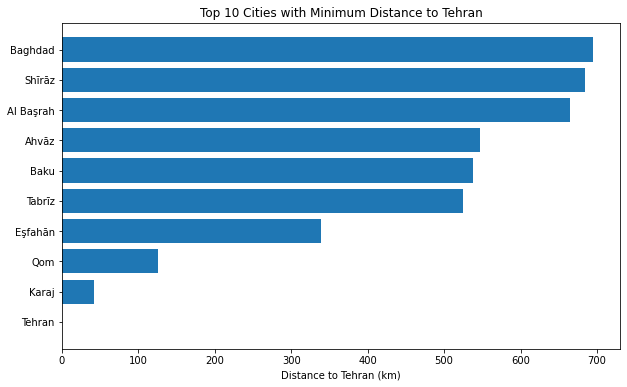

In [93]:
# 10 Nearest Cities to Tehran

# Sort the DataFrame by 'distance_to_tehran' in ascending order
df = df.sort_values(by='distance_to_tehran', ascending=True)

# Select the ten cities with the minimum distance to Tehran
top_10_cities = df.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_cities['city'], top_10_cities['distance_to_tehran'])
plt.xlabel('Distance to Tehran (km)')
plt.title('Top 10 Cities with Minimum Distance to Tehran')

# Save the plot as "plot_1.png"
plt.savefig('plot_1.png')

# Display the plot (optional)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت بعدی می‌خواهیم جمعیت 10 شهری که کمترین فاصله را با تهران دارند را رسم نمایید.
<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید: 
<code> plot_2.png </code>
</font>
</p>

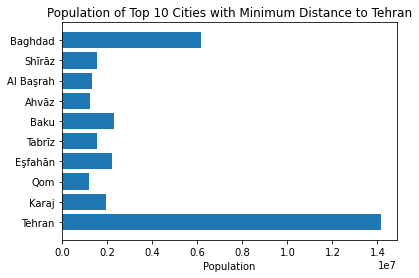

In [94]:
# Population of the 10 Nearest Cities to Tehran

plt.barh(top_10_cities['city'], top_10_cities['population'])
plt.xlabel('Population')
plt.title('Population of Top 10 Cities with Minimum Distance to Tehran')

# Save the plot as "plot_2.png"
plt.savefig('plot_2.png')

# Display the plot (optional)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت آخر میخواهیم نمودار Scatter ای رسم کنید که محور افقی آن Longtitude و محور عمودی آن Latitude باشد. 
</font>
خروجی نهایی این نمودار با توجه به حجم بالای دیتاست بسیار جالب است.

<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید: 
<code> plot_3.png </code>
</p>

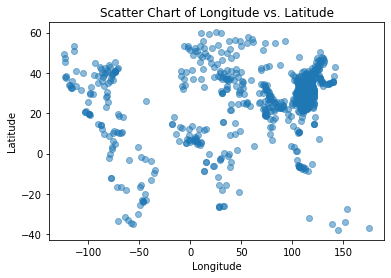

In [95]:
# City Latitudes and Longitudes

plt.scatter(df['lng'], df['lat'], alpha=0.5)  # 'alpha' adjusts the transparency of the points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Chart of Longitude vs. Latitude')

# Save the scatter plot as "plot_3.png"
plt.savefig('plot_3.png')

# Display the plot (optional)
plt.show()

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر نوع مصور سازی دیگر و یا تحلیل و کار با داده در صورتی که به فهم بهتر داده کمک کند نمره امتیازی خواهد داشت.
</p>

</div>

